Dictionary Learning
===================

This example demonstrates the use of class [bpdndl.BPDNDictLearn](http://sporco.rtfd.org/en/latest/sporco.admm.bpdndl.html#sporco.admm.bpdndl.BPDNDictLearn) for learning a dictionary (standard, not convolutional) from a set of training images.

In [1]:
from __future__ import division
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import bpdndl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])

Extract all 8x8 image blocks, reshape, and subtract block means.

In [3]:
S = util.extractblocks((S1, S2, S3, S4, S5), (8, 8))
S = np.reshape(S, (np.prod(S.shape[0:2]), S.shape[2]))
S -= np.mean(S, axis=0)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(S.shape[0], 128)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.1
opt = bpdndl.BPDNDictLearn.Options({'Verbose': True, 'MaxMainIter': 100,
                      'BPDN': {'rho': 10.0*lmbda + 0.1},
                      'CMOD': {'rho': S.shape[1] / 1e3}})

Create solver object and solve.

In [6]:
d = bpdndl.BPDNDictLearn(D0, S, lmbda, opt)
d.solve()
print("BPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D       
--------------------------------------------------------------------------------------------------------


   0  3.01e+04  2.06e+04  9.52e+04  4.46e+00  5.90e-01  6.29e-01  1.10e+00  3.07e-01  5.72e-01  7.32e+01


   1  2.11e+04  6.86e+03  1.42e+05  3.15e-01  3.42e-01  4.38e-01  1.10e+00  3.04e-02  1.51e-01  7.32e+01


   2  1.99e+04  6.58e+03  1.33e+05  5.36e-01  2.11e-01  2.23e-01  1.10e+00  4.61e-02  8.22e-02  7.32e+01


   3  1.93e+04  6.76e+03  1.26e+05  5.60e-01  1.52e-01  1.54e-01  1.10e+00  4.83e-02  6.70e-02  7.32e+01


   4  1.90e+04  6.51e+03  1.25e+05  3.74e-01  1.13e-01  1.17e-01  1.10e+00  3.35e-02  5.67e-02  7.32e+01


   5  1.88e+04  6.51e+03  1.22e+05  3.27e-01  9.45e-02  1.03e-01  1.10e+00  2.99e-02  5.24e-02  7.32e+01


   6  1.86e+04  6.49e+03  1.21e+05  2.93e-01  7.96e-02  9.59e-02  1.10e+00  2.72e-02  4.93e-02  7.32e+01


   7  1.84e+04  6.45e+03  1.19e+05  2.62e-01  7.16e-02  9.16e-02  1.10e+00  2.48e-02  4.70e-02  7.32e+01


   8  1.82e+04  6.40e+03  1.18e+05  2.35e-01  6.44e-02  8.86e-02  1.10e+00  2.26e-02  4.51e-02  7.32e+01


   9  1.81e+04  6.36e+03  1.17e+05  2.16e-01  6.02e-02  8.61e-02  1.10e+00  2.10e-02  4.33e-02  7.32e+01


  10  1.80e+04  6.30e+03  1.17e+05  1.98e-01  5.61e-02  8.38e-02  1.10e+00  1.95e-02  4.15e-02  7.32e+01


  11  1.78e+04  6.25e+03  1.16e+05  1.82e-01  5.33e-02  8.15e-02  1.10e+00  1.81e-02  3.98e-02  7.32e+01


  12  1.77e+04  6.20e+03  1.15e+05  1.68e-01  5.05e-02  7.92e-02  1.10e+00  1.67e-02  3.82e-02  7.32e+01


  13  1.76e+04  6.14e+03  1.15e+05  1.54e-01  4.84e-02  7.70e-02  1.10e+00  1.55e-02  3.66e-02  7.32e+01


  14  1.75e+04  6.09e+03  1.14e+05  1.42e-01  4.62e-02  7.47e-02  1.10e+00  1.44e-02  3.51e-02  7.32e+01


  15  1.74e+04  6.04e+03  1.14e+05  1.32e-01  4.43e-02  7.24e-02  1.10e+00  1.34e-02  3.37e-02  7.32e+01


  16  1.73e+04  5.99e+03  1.14e+05  1.22e-01  4.25e-02  7.01e-02  1.10e+00  1.24e-02  3.24e-02  7.32e+01


  17  1.73e+04  5.94e+03  1.13e+05  1.13e-01  4.08e-02  6.79e-02  1.10e+00  1.16e-02  3.11e-02  7.32e+01


  18  1.72e+04  5.90e+03  1.13e+05  1.05e-01  3.92e-02  6.57e-02  1.10e+00  1.08e-02  2.98e-02  7.32e+01


  19  1.71e+04  5.85e+03  1.13e+05  9.67e-02  3.76e-02  6.34e-02  1.10e+00  1.00e-02  2.86e-02  7.32e+01


  20  1.71e+04  5.81e+03  1.13e+05  8.92e-02  3.60e-02  6.11e-02  1.10e+00  9.31e-03  2.73e-02  7.32e+01


  21  1.70e+04  5.77e+03  1.12e+05  8.22e-02  3.44e-02  5.87e-02  1.10e+00  8.64e-03  2.60e-02  7.32e+01


  22  1.70e+04  5.74e+03  1.12e+05  7.57e-02  3.28e-02  5.63e-02  1.10e+00  8.03e-03  2.47e-02  7.32e+01


  23  1.69e+04  5.70e+03  1.12e+05  6.96e-02  3.13e-02  5.40e-02  1.10e+00  7.46e-03  2.36e-02  7.32e+01


  24  1.69e+04  5.67e+03  1.12e+05  6.43e-02  2.98e-02  5.18e-02  1.10e+00  6.95e-03  2.24e-02  7.32e+01


  25  1.68e+04  5.65e+03  1.12e+05  5.96e-02  2.85e-02  4.98e-02  1.10e+00  6.51e-03  2.14e-02  7.32e+01


  26  1.68e+04  5.62e+03  1.12e+05  5.57e-02  2.73e-02  4.78e-02  1.10e+00  6.12e-03  2.04e-02  7.32e+01


  27  1.68e+04  5.60e+03  1.12e+05  5.26e-02  2.61e-02  4.60e-02  1.10e+00  5.81e-03  1.95e-02  7.32e+01


  28  1.67e+04  5.58e+03  1.12e+05  5.05e-02  2.50e-02  4.44e-02  1.10e+00  5.57e-03  1.86e-02  7.32e+01


  29  1.67e+04  5.56e+03  1.12e+05  4.90e-02  2.40e-02  4.28e-02  1.10e+00  5.39e-03  1.77e-02  7.32e+01


  30  1.67e+04  5.54e+03  1.11e+05  4.78e-02  2.31e-02  4.13e-02  1.10e+00  5.22e-03  1.69e-02  7.32e+01


  31  1.67e+04  5.52e+03  1.11e+05  4.67e-02  2.21e-02  3.98e-02  1.10e+00  5.08e-03  1.61e-02  7.32e+01


  32  1.66e+04  5.51e+03  1.11e+05  4.61e-02  2.13e-02  3.84e-02  1.10e+00  4.97e-03  1.54e-02  7.32e+01


  33  1.66e+04  5.49e+03  1.11e+05  4.55e-02  2.04e-02  3.70e-02  1.10e+00  4.88e-03  1.46e-02  7.32e+01


  34  1.66e+04  5.48e+03  1.11e+05  4.48e-02  1.95e-02  3.56e-02  1.10e+00  4.77e-03  1.39e-02  7.32e+01


  35  1.66e+04  5.47e+03  1.11e+05  4.42e-02  1.87e-02  3.42e-02  1.10e+00  4.67e-03  1.32e-02  7.32e+01


  36  1.66e+04  5.46e+03  1.11e+05  4.33e-02  1.79e-02  3.29e-02  1.10e+00  4.56e-03  1.26e-02  7.32e+01


  37  1.66e+04  5.45e+03  1.11e+05  4.24e-02  1.71e-02  3.17e-02  1.10e+00  4.45e-03  1.21e-02  7.32e+01


  38  1.65e+04  5.44e+03  1.11e+05  4.14e-02  1.64e-02  3.05e-02  1.10e+00  4.33e-03  1.15e-02  7.32e+01


  39  1.65e+04  5.43e+03  1.11e+05  4.05e-02  1.57e-02  2.93e-02  1.10e+00  4.22e-03  1.10e-02  7.32e+01


  40  1.65e+04  5.42e+03  1.11e+05  3.97e-02  1.51e-02  2.82e-02  1.10e+00  4.12e-03  1.06e-02  7.32e+01


  41  1.65e+04  5.42e+03  1.11e+05  3.88e-02  1.45e-02  2.73e-02  1.10e+00  4.01e-03  1.01e-02  7.32e+01


  42  1.65e+04  5.41e+03  1.11e+05  3.78e-02  1.40e-02  2.64e-02  1.10e+00  3.90e-03  9.78e-03  7.32e+01


  43  1.65e+04  5.40e+03  1.11e+05  3.70e-02  1.35e-02  2.55e-02  1.10e+00  3.80e-03  9.44e-03  7.32e+01


  44  1.65e+04  5.40e+03  1.11e+05  3.64e-02  1.30e-02  2.47e-02  1.10e+00  3.72e-03  9.14e-03  7.32e+01


  45  1.65e+04  5.39e+03  1.11e+05  3.55e-02  1.26e-02  2.40e-02  1.10e+00  3.63e-03  8.87e-03  7.32e+01


  46  1.65e+04  5.39e+03  1.11e+05  3.46e-02  1.22e-02  2.33e-02  1.10e+00  3.53e-03  8.61e-03  7.32e+01


  47  1.65e+04  5.38e+03  1.11e+05  3.37e-02  1.19e-02  2.27e-02  1.10e+00  3.43e-03  8.37e-03  7.32e+01


  48  1.64e+04  5.38e+03  1.11e+05  3.28e-02  1.15e-02  2.21e-02  1.10e+00  3.34e-03  8.15e-03  7.32e+01


  49  1.64e+04  5.37e+03  1.11e+05  3.21e-02  1.12e-02  2.15e-02  1.10e+00  3.26e-03  7.92e-03  7.32e+01


  50  1.64e+04  5.37e+03  1.11e+05  3.13e-02  1.09e-02  2.10e-02  1.10e+00  3.18e-03  7.70e-03  7.32e+01


  51  1.64e+04  5.37e+03  1.11e+05  3.05e-02  1.06e-02  2.05e-02  1.10e+00  3.10e-03  7.47e-03  7.32e+01


  52  1.64e+04  5.36e+03  1.11e+05  2.97e-02  1.03e-02  1.99e-02  1.10e+00  3.02e-03  7.26e-03  7.32e+01


  53  1.64e+04  5.36e+03  1.11e+05  2.89e-02  1.01e-02  1.94e-02  1.10e+00  2.94e-03  7.05e-03  7.32e+01


  54  1.64e+04  5.36e+03  1.11e+05  2.81e-02  9.78e-03  1.89e-02  1.10e+00  2.86e-03  6.84e-03  7.32e+01


  55  1.64e+04  5.35e+03  1.11e+05  2.73e-02  9.52e-03  1.85e-02  1.10e+00  2.78e-03  6.63e-03  7.32e+01


  56  1.64e+04  5.35e+03  1.11e+05  2.66e-02  9.26e-03  1.80e-02  1.10e+00  2.70e-03  6.44e-03  7.32e+01


  57  1.64e+04  5.35e+03  1.11e+05  2.58e-02  9.01e-03  1.76e-02  1.10e+00  2.62e-03  6.25e-03  7.32e+01


  58  1.64e+04  5.34e+03  1.11e+05  2.50e-02  8.77e-03  1.71e-02  1.10e+00  2.55e-03  6.08e-03  7.32e+01


  59  1.64e+04  5.34e+03  1.10e+05  2.42e-02  8.54e-03  1.67e-02  1.10e+00  2.47e-03  5.92e-03  7.32e+01


  60  1.64e+04  5.34e+03  1.10e+05  2.35e-02  8.33e-03  1.63e-02  1.10e+00  2.40e-03  5.77e-03  7.32e+01


  61  1.64e+04  5.34e+03  1.10e+05  2.28e-02  8.12e-03  1.60e-02  1.10e+00  2.33e-03  5.63e-03  7.32e+01


  62  1.64e+04  5.33e+03  1.10e+05  2.21e-02  7.93e-03  1.56e-02  1.10e+00  2.27e-03  5.50e-03  7.32e+01


  63  1.64e+04  5.33e+03  1.10e+05  2.14e-02  7.75e-03  1.53e-02  1.10e+00  2.20e-03  5.38e-03  7.32e+01


  64  1.64e+04  5.33e+03  1.10e+05  2.07e-02  7.58e-03  1.50e-02  1.10e+00  2.14e-03  5.26e-03  7.32e+01


  65  1.64e+04  5.33e+03  1.10e+05  2.01e-02  7.41e-03  1.47e-02  1.10e+00  2.08e-03  5.16e-03  7.32e+01


  66  1.64e+04  5.33e+03  1.10e+05  1.95e-02  7.27e-03  1.44e-02  1.10e+00  2.02e-03  5.06e-03  7.32e+01


  67  1.64e+04  5.32e+03  1.10e+05  1.89e-02  7.13e-03  1.42e-02  1.10e+00  1.97e-03  4.97e-03  7.32e+01


  68  1.64e+04  5.32e+03  1.10e+05  1.83e-02  7.01e-03  1.40e-02  1.10e+00  1.92e-03  4.90e-03  7.32e+01


  69  1.64e+04  5.32e+03  1.10e+05  1.78e-02  6.90e-03  1.38e-02  1.10e+00  1.87e-03  4.82e-03  7.32e+01


  70  1.64e+04  5.32e+03  1.10e+05  1.72e-02  6.79e-03  1.36e-02  1.10e+00  1.82e-03  4.76e-03  7.32e+01


  71  1.64e+04  5.32e+03  1.10e+05  1.68e-02  6.70e-03  1.34e-02  1.10e+00  1.78e-03  4.70e-03  7.32e+01


  72  1.64e+04  5.32e+03  1.10e+05  1.64e-02  6.61e-03  1.32e-02  1.10e+00  1.74e-03  4.64e-03  7.32e+01


  73  1.63e+04  5.31e+03  1.10e+05  1.60e-02  6.53e-03  1.31e-02  1.10e+00  1.71e-03  4.59e-03  7.32e+01


  74  1.63e+04  5.31e+03  1.10e+05  1.56e-02  6.46e-03  1.30e-02  1.10e+00  1.67e-03  4.54e-03  7.32e+01


  75  1.63e+04  5.31e+03  1.10e+05  1.52e-02  6.39e-03  1.29e-02  1.10e+00  1.64e-03  4.49e-03  7.32e+01


  76  1.63e+04  5.31e+03  1.10e+05  1.49e-02  6.32e-03  1.27e-02  1.10e+00  1.61e-03  4.44e-03  7.32e+01


  77  1.63e+04  5.31e+03  1.10e+05  1.45e-02  6.26e-03  1.26e-02  1.10e+00  1.58e-03  4.40e-03  7.32e+01


  78  1.63e+04  5.31e+03  1.10e+05  1.42e-02  6.19e-03  1.25e-02  1.10e+00  1.56e-03  4.35e-03  7.32e+01


  79  1.63e+04  5.30e+03  1.10e+05  1.39e-02  6.13e-03  1.23e-02  1.10e+00  1.53e-03  4.31e-03  7.32e+01


  80  1.63e+04  5.30e+03  1.10e+05  1.36e-02  6.05e-03  1.22e-02  1.10e+00  1.50e-03  4.26e-03  7.32e+01


  81  1.63e+04  5.30e+03  1.10e+05  1.34e-02  5.98e-03  1.20e-02  1.10e+00  1.48e-03  4.21e-03  7.32e+01


  82  1.63e+04  5.30e+03  1.10e+05  1.31e-02  5.90e-03  1.19e-02  1.10e+00  1.46e-03  4.16e-03  7.32e+01


  83  1.63e+04  5.30e+03  1.10e+05  1.29e-02  5.83e-03  1.17e-02  1.10e+00  1.44e-03  4.11e-03  7.32e+01


  84  1.63e+04  5.30e+03  1.10e+05  1.27e-02  5.75e-03  1.16e-02  1.10e+00  1.42e-03  4.06e-03  7.32e+01


  85  1.63e+04  5.29e+03  1.10e+05  1.25e-02  5.68e-03  1.14e-02  1.10e+00  1.40e-03  4.01e-03  7.32e+01


  86  1.63e+04  5.29e+03  1.10e+05  1.23e-02  5.60e-03  1.13e-02  1.10e+00  1.38e-03  3.96e-03  7.32e+01


  87  1.63e+04  5.29e+03  1.10e+05  1.21e-02  5.53e-03  1.12e-02  1.10e+00  1.37e-03  3.91e-03  7.32e+01


  88  1.63e+04  5.29e+03  1.10e+05  1.19e-02  5.45e-03  1.10e-02  1.10e+00  1.35e-03  3.86e-03  7.32e+01


  89  1.63e+04  5.29e+03  1.10e+05  1.18e-02  5.38e-03  1.09e-02  1.10e+00  1.34e-03  3.81e-03  7.32e+01


  90  1.63e+04  5.29e+03  1.10e+05  1.16e-02  5.31e-03  1.07e-02  1.10e+00  1.32e-03  3.76e-03  7.32e+01


  91  1.63e+04  5.29e+03  1.10e+05  1.15e-02  5.24e-03  1.06e-02  1.10e+00  1.31e-03  3.72e-03  7.32e+01


  92  1.63e+04  5.29e+03  1.10e+05  1.14e-02  5.18e-03  1.05e-02  1.10e+00  1.30e-03  3.67e-03  7.32e+01


  93  1.63e+04  5.28e+03  1.10e+05  1.12e-02  5.11e-03  1.03e-02  1.10e+00  1.28e-03  3.63e-03  7.32e+01


  94  1.63e+04  5.28e+03  1.10e+05  1.11e-02  5.05e-03  1.02e-02  1.10e+00  1.27e-03  3.58e-03  7.32e+01


  95  1.63e+04  5.28e+03  1.10e+05  1.10e-02  4.98e-03  1.01e-02  1.10e+00  1.26e-03  3.54e-03  7.32e+01


  96  1.63e+04  5.28e+03  1.10e+05  1.09e-02  4.92e-03  9.97e-03  1.10e+00  1.25e-03  3.50e-03  7.32e+01


  97  1.63e+04  5.28e+03  1.10e+05  1.08e-02  4.87e-03  9.86e-03  1.10e+00  1.24e-03  3.46e-03  7.32e+01


  98  1.63e+04  5.28e+03  1.10e+05  1.07e-02  4.81e-03  9.76e-03  1.10e+00  1.23e-03  3.42e-03  7.32e+01


  99  1.63e+04  5.28e+03  1.10e+05  1.06e-02  4.76e-03  9.66e-03  1.10e+00  1.22e-03  3.38e-03  7.32e+01
--------------------------------------------------------------------------------------------------------
BPDNDictLearn solve time: 91.04s


Display initial and final dictionaries.

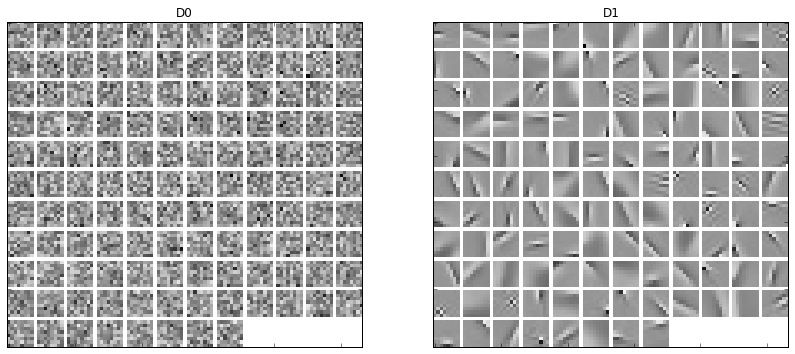

In [7]:
D1 = d.getdict().reshape((8, 8, D0.shape[1]))
D0 = D0.reshape(8, 8, D0.shape[-1])
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

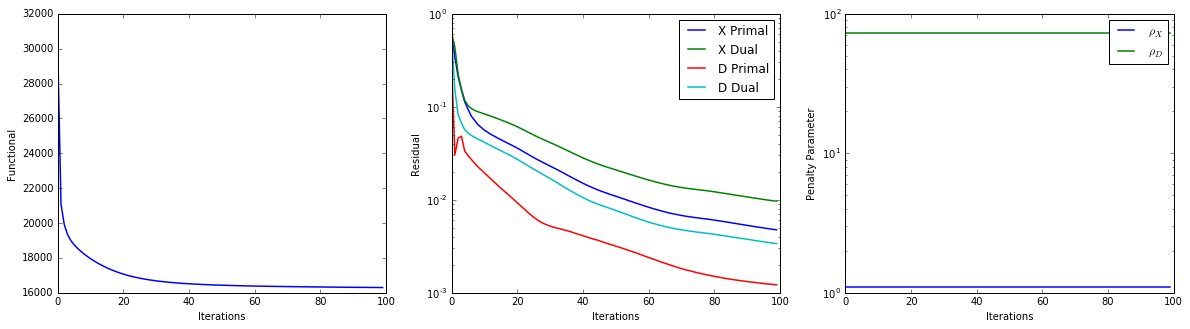

In [8]:
its = d.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.XPrRsdl, its.XDlRsdl, its.DPrRsdl,
          its.DDlRsdl)).T, ptyp='semilogy', xlbl='Iterations',
          ylbl='Residual', lgnd=['X Primal', 'X Dual', 'D Primal', 'D Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(np.vstack((its.XRho, its.DRho)).T, xlbl='Iterations',
          ylbl='Penalty Parameter', ptyp='semilogy',
          lgnd=['$\\rho_X$', '$\\rho_D$'], fig=fig)
fig.show()